In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy
from FokkerPlanck import *
%matplotlib inline

# Purpose

This notebook was established for building the methods testing the time and space convergence behaviours of the three operator approach. We solve for the error with respect to the exact solution at with using different time steps and different spatial steps. Then we plot them and look at the overall behaviour (1st or 2nd order).

# Exact Solution + Parameters

In [2]:
dim = 81

nx = np.linspace(-4,4,dim)
ny = np.linspace(-4,4,dim)

# nx = np.linspace(-4-np.diff(nx)[0],4+np.diff(nx)[0],dim+2)
# ny = np.linspace(-4-np.diff(ny)[0],4+np.diff(ny)[0],dim+2)

X, Y = np.meshgrid(nx,ny)

#Functions
K=1
gamma = 2.1
sigma = 0.8

a_1 = lambda x,y: K*x
a_2 = lambda x,y: gamma*y
a_3 = lambda x,y: 0
a_4 = lambda x,y: sigma

g = lambda x,y: a_1(x,y)+a_2(x,y)

In [3]:
mu_1 = -gamma/2+np.sqrt(gamma*gamma/4-K)
mu_2 = -gamma/2-np.sqrt(gamma*gamma/4-K)

xi = lambda x,v,t: (x*mu_1-v)*np.exp(-mu_2*t)
nu = lambda x,v,t: (x*mu_2-v)*np.exp(-mu_1*t)

a = lambda t: (sigma/mu_1)*(1-np.exp(-2*mu_1*t))
b = lambda t: (sigma/mu_2)*(1-np.exp(-2*mu_2*t))
h = lambda t: (-2*sigma/(mu_1+mu_2))*(1-np.exp(-(mu_1+mu_2)*t))
delta = lambda t: a(t)*b(t)-h(t)*h(t)

y_0=0
x_0=0

top = lambda x,y,t: (a(t)*(xi(x,y,t)-xi(x_0,y_0,0))**2+2*h(t)*(xi(x,y,t)-xi(x_0,y_0,0))*(nu(x,y,t)-nu(x_0,y_0,0))+b(t)*(nu(x,y,t)-nu(x_0,y_0,0))**2)/(2*delta(t))
rho = lambda x,y,t: np.exp(gamma*t)*np.exp(-top(x,y,t))/(2*np.pi*np.sqrt(delta(t)))

# Further convergence study:

## IICN

### Space Convergence

In [4]:
dims = [21,41,61,81,121]
total_errors = []

for d in dims:

    nx = np.linspace(-4,4,d)
    ny = np.linspace(-4,4,d)

    # nx = np.linspace(-4-np.diff(nx)[0],4+np.diff(nx)[0],dim+2)
    # ny = np.linspace(-4-np.diff(ny)[0],4+np.diff(ny)[0],dim+2)

    t_X, t_Y = np.meshgrid(nx,ny)
    delta_x = np.diff(nx)[0]
    
    sol,errors = run_test(delta_x,np.pi/1000,300,rho(t_X,t_Y,0.95),L1 =implicit_L1,L2=implicit_L2,L3=solve_CN,X=t_X,Y=t_Y,g=g,rho=rho,t_0=0.95)
    total_errors.append(errors[-1])

Beginning Test
@ Timestep 0
@ Timestep 100
@ Timestep 200
Beginning Test
@ Timestep 0
@ Timestep 100
@ Timestep 200
Beginning Test
@ Timestep 0
@ Timestep 100
@ Timestep 200
Beginning Test
@ Timestep 0
@ Timestep 100
@ Timestep 200
Beginning Test
@ Timestep 0
@ Timestep 100
@ Timestep 200


Text(0.5, 0, '$\\Delta$ x')

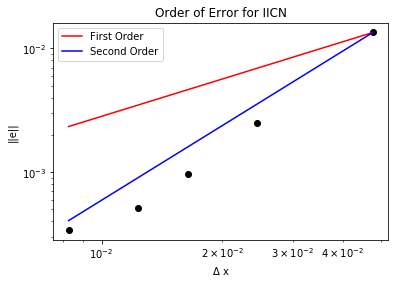

In [5]:
f = lambda xs, order: np.power(xs/xs[0],order)

delta_xs = np.array([1/21,1/41,1/61,1/81,1/121])

plt.title("Order of Error for IICN")
plt.loglog(delta_xs,total_errors,'ko')
plt.loglog(delta_xs,total_errors[0]*f(delta_xs,1),label="First Order",c='r')
plt.loglog(delta_xs,total_errors[0]*f(delta_xs,2),label="Second Order",c='b')
plt.legend()
plt.ylabel("||e||")
plt.xlabel(r"$\Delta$ x")

### Time Convergence

In [6]:
time_steps = [100,200,400,800]

D = (800*np.pi)/(1000)
time_error = []
time_delta = []

for t in time_steps:
    sol_IICN = run_test(0.1,D/t,t,rho(X,Y,0.95),L1 =implicit_L1,L2=implicit_L2,L3=solve_CN,X=X,Y=Y,g=g,rho=rho,t_0=0.95)
    time_error.append(sol_IICN[1][-1])
    time_delta.append(D/t)

Beginning Test
@ Timestep 0
Beginning Test
@ Timestep 0
@ Timestep 100
Beginning Test
@ Timestep 0
@ Timestep 100
@ Timestep 200
@ Timestep 300
Beginning Test
@ Timestep 0
@ Timestep 100
@ Timestep 200
@ Timestep 300
@ Timestep 400
@ Timestep 500
@ Timestep 600
@ Timestep 700


Text(0.5, 0, '$\\Delta$ t')

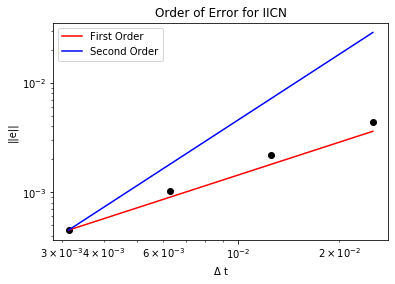

In [7]:
f = lambda xs, order: np.power(xs/xs[0],order)

time_error = np.array(time_error)[::-1]
time_delta = np.array(time_delta)[::-1]

plt.title("Order of Error for IICN")
plt.loglog(time_delta,time_error,'ko')
plt.loglog(time_delta,time_error[0]*f(time_delta,1),label="First Order",c='r')
plt.loglog(time_delta,time_error[0]*f(time_delta,2),label="Second Order",c='b')
plt.legend()
plt.ylabel("||e||")
plt.xlabel(r"$\Delta$ t")

## IIBE

### Space Convergence

In [8]:
dims = [21,41,61,81,121]
total_errors = []

for d in dims:

    nx = np.linspace(-4,4,d)
    ny = np.linspace(-4,4,d)

    # nx = np.linspace(-4-np.diff(nx)[0],4+np.diff(nx)[0],dim+2)
    # ny = np.linspace(-4-np.diff(ny)[0],4+np.diff(ny)[0],dim+2)

    t_X, t_Y = np.meshgrid(nx,ny)
    delta_x = np.diff(nx)[0]
    
    sol,errors = run_test(delta_x,np.pi/1000,300,rho(t_X,t_Y,0.95),L1 =implicit_L1,L2=implicit_L2,L3=solve_BE,X=t_X,Y=t_Y,g=g,rho=rho,t_0=0.95)
    total_errors.append(errors[-1])

Beginning Test
@ Timestep 0
@ Timestep 100
@ Timestep 200
Beginning Test
@ Timestep 0
@ Timestep 100
@ Timestep 200
Beginning Test
@ Timestep 0
@ Timestep 100
@ Timestep 200
Beginning Test
@ Timestep 0
@ Timestep 100
@ Timestep 200
Beginning Test
@ Timestep 0
@ Timestep 100
@ Timestep 200


Text(0.5, 0, '$\\Delta$ x')

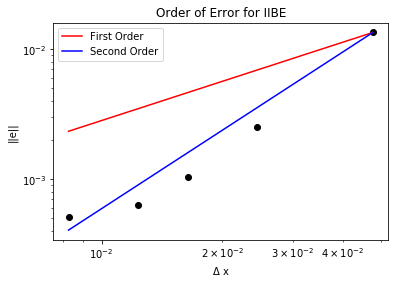

In [9]:
f = lambda xs, order: np.power(xs/xs[0],order)

delta_xs = np.array([1/21,1/41,1/61,1/81,1/121])

plt.title("Order of Error for IIBE")
plt.loglog(delta_xs,total_errors,'ko')
plt.loglog(delta_xs,total_errors[0]*f(delta_xs,1),label="First Order",c='r')
plt.loglog(delta_xs,total_errors[0]*f(delta_xs,2),label="Second Order",c='b')
plt.legend()
plt.ylabel("||e||")
plt.xlabel(r"$\Delta$ x")

### Time Convergence

In [10]:
time_steps = [100,200,400,800]

D = (800*np.pi)/(1000)
time_error = []
time_delta = []

for t in time_steps:
    sol_IIBE = run_test(0.1,D/t,t,rho(X,Y,0.95),L1 =implicit_L1,L2=implicit_L2,L3=solve_BE,X=X,Y=Y,g=g,rho=rho,t_0=0.95)
    time_error.append(sol_IIBE[1][-1])
    time_delta.append(D/t)

Beginning Test
@ Timestep 0
Beginning Test
@ Timestep 0
@ Timestep 100
Beginning Test
@ Timestep 0
@ Timestep 100
@ Timestep 200
@ Timestep 300
Beginning Test
@ Timestep 0
@ Timestep 100
@ Timestep 200
@ Timestep 300
@ Timestep 400
@ Timestep 500
@ Timestep 600
@ Timestep 700


Text(0.5, 0, '$\\Delta$ t')

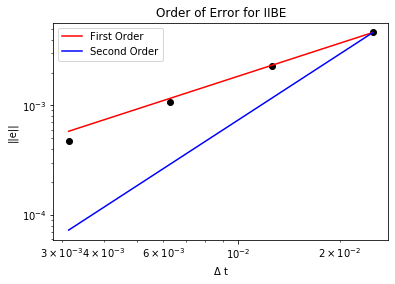

In [11]:
f = lambda xs, order: np.power(xs/xs[0],order)

time_error = np.array(time_error)
time_delta = np.array(time_delta)

plt.title("Order of Error for IIBE")
plt.loglog(time_delta,time_error,'ko')
plt.loglog(time_delta,time_error[0]*f(time_delta,1),label="First Order",c='r')
plt.loglog(time_delta,time_error[0]*f(time_delta,2),label="Second Order",c='b')
plt.legend()
plt.ylabel("||e||")
plt.xlabel(r"$\Delta$ t")

## EIBE



## Space Convergence

In [12]:
dims = [21,41,61,81,121]
total_errors = []

for d in dims:

    nx = np.linspace(-4,4,d)
    ny = np.linspace(-4,4,d)

    # nx = np.linspace(-4-np.diff(nx)[0],4+np.diff(nx)[0],dim+2)
    # ny = np.linspace(-4-np.diff(ny)[0],4+np.diff(ny)[0],dim+2)

    t_X, t_Y = np.meshgrid(nx,ny)
    delta_x = np.diff(nx)[0]
    
    sol,errors = run_test(delta_x,np.pi/1000,300,rho(t_X,t_Y,0.95),L1 =explicit_L1,L2=implicit_L2,L3=solve_BE,X=t_X,Y=t_Y,g=g,rho=rho,t_0=0.95)
    total_errors.append(errors[-1])

Beginning Test
@ Timestep 0
@ Timestep 100
@ Timestep 200
Beginning Test
@ Timestep 0
@ Timestep 100
@ Timestep 200
Beginning Test
@ Timestep 0
@ Timestep 100
@ Timestep 200
Beginning Test
@ Timestep 0
@ Timestep 100
@ Timestep 200
Beginning Test
@ Timestep 0
@ Timestep 100
@ Timestep 200


Text(0.5, 0, '$\\Delta$ x')

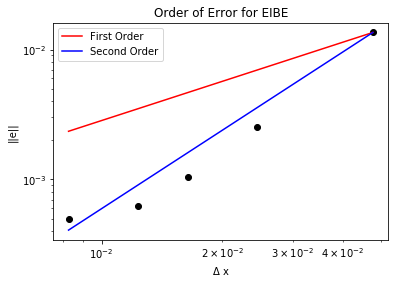

In [13]:
f = lambda xs, order: np.power(xs/xs[0],order)

delta_xs = np.array([1/21,1/41,1/61,1/81,1/121])

plt.title("Order of Error for EIBE")
plt.loglog(delta_xs,total_errors,'ko')
plt.loglog(delta_xs,total_errors[0]*f(delta_xs,1),label="First Order",c='r')
plt.loglog(delta_xs,total_errors[0]*f(delta_xs,2),label="Second Order",c='b')
plt.legend()
plt.ylabel("||e||")
plt.xlabel(r"$\Delta$ x")

### Time Convergence

In [14]:
time_steps = [100,200,400,800]

D = (800*np.pi)/(1000)
time_error = []
time_delta = []

for t in time_steps:
    sol_EIBE = run_test(0.1,D/t,t,rho(X,Y,0.95),L1 =explicit_L1,L2=implicit_L2,L3=solve_BE,X=X,Y=Y,g=g,rho=rho,t_0=0.95)
    time_error.append(sol_EIBE[1][-1])
    time_delta.append(D/t)

Beginning Test
@ Timestep 0
Beginning Test
@ Timestep 0
@ Timestep 100
Beginning Test
@ Timestep 0
@ Timestep 100
@ Timestep 200
@ Timestep 300
Beginning Test
@ Timestep 0
@ Timestep 100
@ Timestep 200
@ Timestep 300
@ Timestep 400
@ Timestep 500
@ Timestep 600
@ Timestep 700


Text(0.5, 0, '$\\Delta$ t')

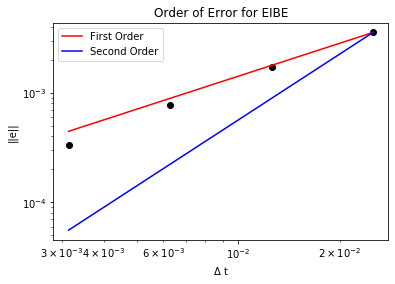

In [15]:
f = lambda xs, order: np.power(xs/xs[0],order)

time_error = np.array(time_error)
time_delta = np.array(time_delta)

plt.title("Order of Error for EIBE")
plt.loglog(time_delta,time_error,'ko')
plt.loglog(time_delta,time_error[0]*f(time_delta,1),label="First Order",c='r')
plt.loglog(time_delta,time_error[0]*f(time_delta,2),label="Second Order",c='b')
plt.legend()
plt.ylabel("||e||")
plt.xlabel(r"$\Delta$ t")

## EICN

### Space Convergence

In [16]:
dims = [21,41,61,81,121]
total_errors = []

for d in dims:

    nx = np.linspace(-4,4,d)
    ny = np.linspace(-4,4,d)

    # nx = np.linspace(-4-np.diff(nx)[0],4+np.diff(nx)[0],dim+2)
    # ny = np.linspace(-4-np.diff(ny)[0],4+np.diff(ny)[0],dim+2)

    t_X, t_Y = np.meshgrid(nx,ny)
    delta_x = np.diff(nx)[0]
    
    sol,errors = run_test(delta_x,np.pi/1000,300,rho(t_X,t_Y,0.95),L1 =explicit_L1,L2=implicit_L2,L3=solve_CN,X=t_X,Y=t_Y,g=g,rho=rho,t_0=0.95)
    total_errors.append(errors[-1])

Beginning Test
@ Timestep 0
@ Timestep 100
@ Timestep 200
Beginning Test
@ Timestep 0
@ Timestep 100
@ Timestep 200
Beginning Test
@ Timestep 0
@ Timestep 100
@ Timestep 200
Beginning Test
@ Timestep 0
@ Timestep 100
@ Timestep 200
Beginning Test
@ Timestep 0
@ Timestep 100
@ Timestep 200


Text(0.5, 0, '$\\Delta$ x')

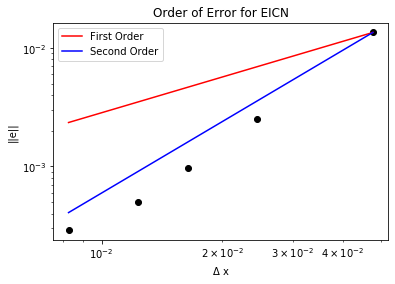

In [17]:
f = lambda xs, order: np.power(xs/xs[0],order)

delta_xs = np.array([1/21,1/41,1/61,1/81,1/121])

plt.title("Order of Error for EICN")
plt.loglog(delta_xs,total_errors,'ko')
plt.loglog(delta_xs,total_errors[0]*f(delta_xs,1),label="First Order",c='r')
plt.loglog(delta_xs,total_errors[0]*f(delta_xs,2),label="Second Order",c='b')
plt.legend()
plt.ylabel("||e||")
plt.xlabel(r"$\Delta$ x")

### Time Convergence

In [18]:
time_steps = [100,200,400,800]

D = (800*np.pi)/(1000)
time_error = []
time_delta = []

for t in time_steps:
    sol_EICN = run_test(0.1,D/t,t,rho(X,Y,0.95),L1 =explicit_L1,L2=implicit_L2,L3=solve_CN,X=X,Y=Y,g=g,rho=rho,t_0=0.95)
    time_error.append(sol_EICN[1][-1])
    time_delta.append(D/t)

Beginning Test
@ Timestep 0
Beginning Test
@ Timestep 0
@ Timestep 100
Beginning Test
@ Timestep 0
@ Timestep 100
@ Timestep 200
@ Timestep 300
Beginning Test
@ Timestep 0
@ Timestep 100
@ Timestep 200
@ Timestep 300
@ Timestep 400
@ Timestep 500
@ Timestep 600
@ Timestep 700


Text(0.5, 0, '$\\Delta$ t')

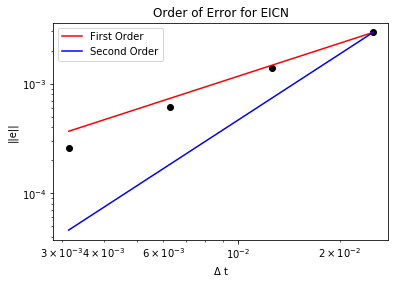

In [19]:
f = lambda xs, order: np.power(xs/xs[0],order)

time_error = np.array(time_error)
time_delta = np.array(time_delta)

plt.title("Order of Error for EICN")
plt.loglog(time_delta,time_error,'ko')
plt.loglog(time_delta,time_error[0]*f(time_delta,1),label="First Order",c='r')
plt.loglog(time_delta,time_error[0]*f(time_delta,2),label="Second Order",c='b')
plt.legend()
plt.ylabel("||e||")
plt.xlabel(r"$\Delta$ t")